In [1]:
# scanpy PCA
import scanpy as sc

In [2]:
# 1. Load example dataset (10x Genomics PBMCs). Replace with your own file if needed.
adata = sc.datasets.pbmc3k()  # Built-in example data; alternatively use sc.read_10x_h5(...) or sc.read_h5ad(...)

In [3]:
# 2. Basic preprocessing: filter cells and genes, normalize counts, and log-transform
sc.pp.filter_cells(adata, min_genes=200)        # Remove cells with fewer than 200 detected genes
sc.pp.filter_genes(adata, min_cells=3)          # Remove genes expressed in fewer than 3 cells
sc.pp.normalize_total(adata, target_sum=1e4)    # Normalize each cell’s total counts to 10,000
sc.pp.log1p(adata)                              # Apply log(x + 1) transformation

In [4]:
# 3. Identify highly variable genes (HVGs); keep top 2,000 for PCA
sc.pp.highly_variable_genes(adata, n_top_genes=2000, flavor='seurat_v3')
adata = adata[:, adata.var.highly_variable]     # Subset to HVGs only

/Volumes/devinjzhu/miniconda3/envs/celldecoder/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:75: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [6]:
# 4. Regress out unwanted sources of variation and scale data
# sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])  # Regress out total counts and mitochondrial percentage
sc.pp.scale(adata, max_value=10)                              # Scale each gene to unit variance, clip values >10

In [7]:
# 5. Run PCA to compute the first 50 principal components
sc.pp.pca(adata, n_comps=50, svd_solver='arpack')

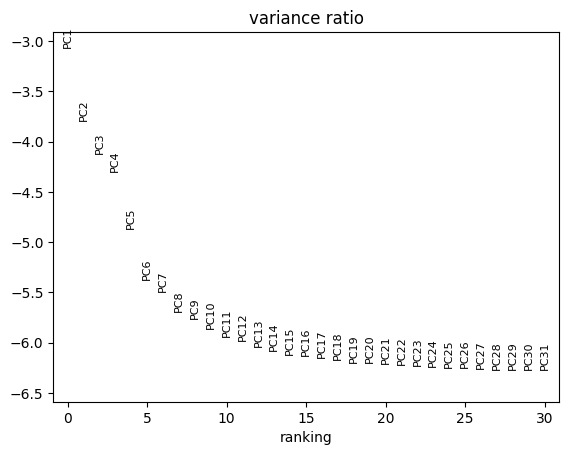

In [8]:
# 6. Inspect PCA results
sc.pl.pca_variance_ratio(adata, log=True)